In [ ]:
import sqlite3

import pandas as pd

# Подключение к базе данных (файл будет создан автоматически)
conn = sqlite3.connect('titanic.db')
cursor = conn.cursor()

# Создание таблицы passengers
create_table_query = '''
CREATE TABLE IF NOT EXISTS passengers (
    PassengerId INTEGER PRIMARY KEY,
    Survived INTEGER,
    Pclass INTEGER,
    Name TEXT,
    Sex TEXT,
    Age REAL,
    SibSp INTEGER,
    Parch INTEGER,
    Ticket TEXT,
    Fare REAL,
    Cabin TEXT,
    Embarked TEXT
);
'''
cursor.execute(create_table_query)
conn.commit()

# Загрузка CSV-файла в DataFrame
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(url)

# Импорт DataFrame в SQLite
df.to_sql('passengers', conn, if_exists='replace', index=False)

# Проверка первых 5 записей
query = "SELECT * FROM passengers LIMIT 5;"
print(pd.read_sql_query(query, conn))

conn.close()

female класс 1: 96.81%
female класс 2: 92.11%
female класс 3: 50.0%
male класс 1: 36.89%
male класс 2: 15.74%
male класс 3: 13.7%
Выжившие пассажиры:
Mrs. John Bradley (Florence Briggs Thayer) Cumings - Выжил: Да
Miss. Laina Heikkinen - Выжил: Да
Mrs. Jacques Heath (Lily May Peel) Futrelle - Выжил: Да
Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson - Выжил: Да
Mrs. Nicholas (Adele Achem) Nasser - Выжил: Да

Статистика по классам:
Класс 1: 62.96% выживших
Класс 2: 47.28% выживших
Класс 3: 24.44% выживших

Самые дорогие билеты:
Miss. Anna Ward: $512.33
Mr. Thomas Drake Martinez Cardeza: $512.33
Mr. Gustave J Lesurer: $512.33
🚢 Анализ данных Titanic - Dashboard

Всего пассажиров: 887
Выжило: 342 (38.6%)


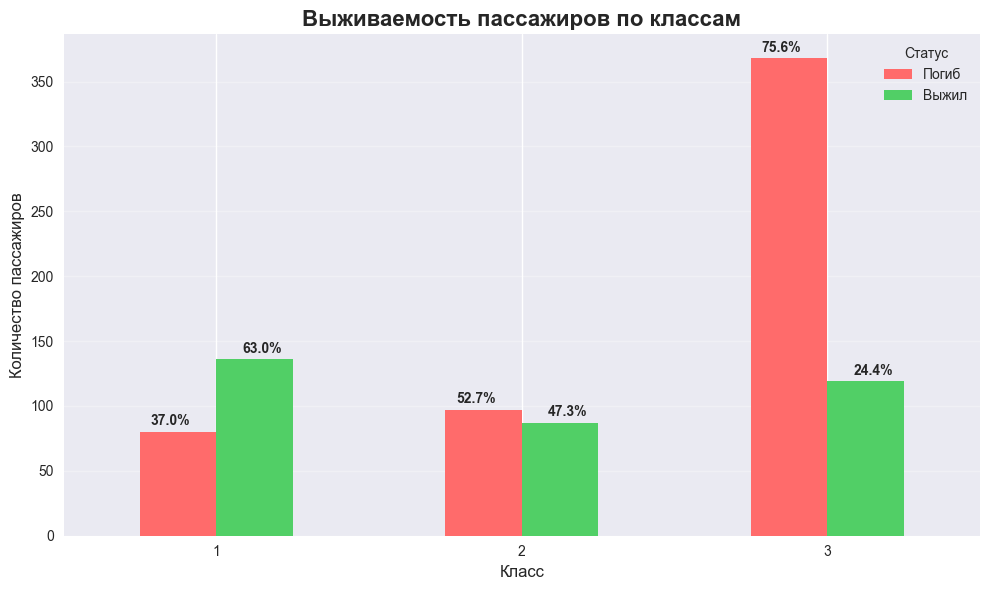

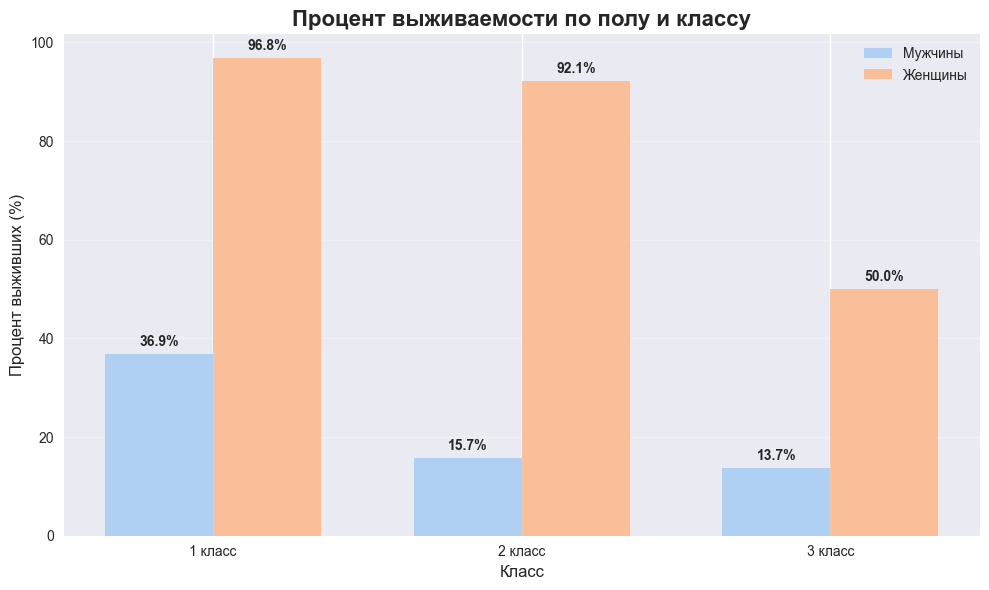

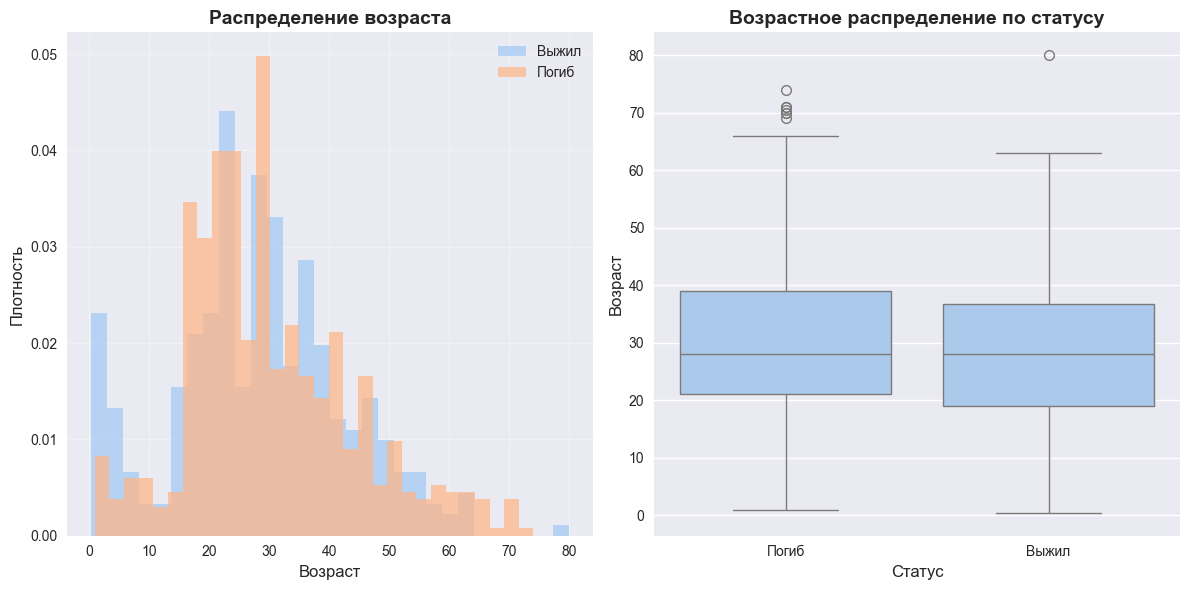

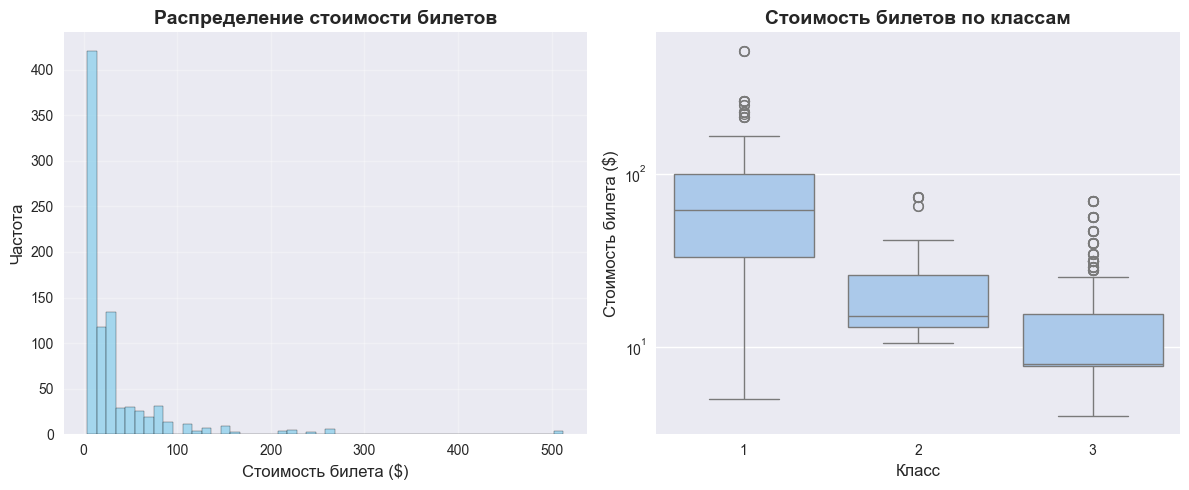

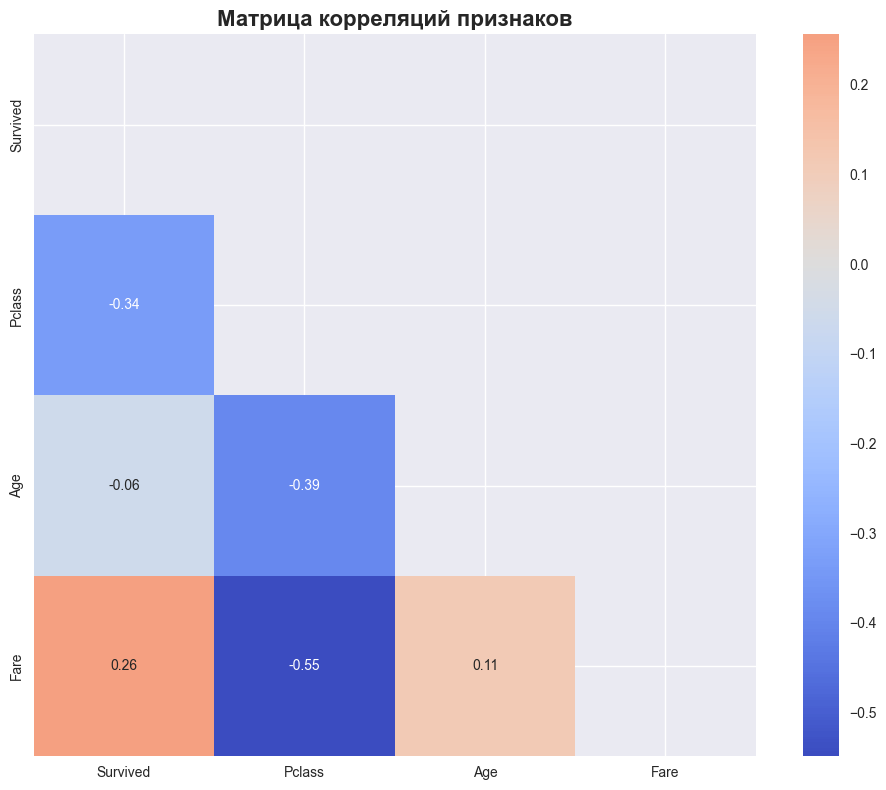

In [3]:
from dataSelect import TitanicDatabase
from visualizer import TitanicVisualizer

# Создание экземпляра и работа с базой
db = TitanicDatabase('titanic.db')

# Получение статистики
stats = db.get_survival_rate_by_gender_class()
for item in stats:
    print(f"{item['Sex']} класс {item['Pclass']}: {item['SurvivalRate']}%")

# Получить выживших
survivors = db.get_survivors(5)
print("Выжившие пассажиры:")
for passenger in survivors:
    print(f"{passenger['Name']} - Выжил: {'Да' if passenger['Survived'] else 'Нет'}")

# Получить статистику по классам
class_stats = db.get_survival_rate_by_class()
print("\nСтатистика по классам:")
for stat in class_stats:
    print(f"Класс {stat['Pclass']}: {stat['SurvivalRate']}% выживших")

# Получить топ дорогих билетов
expensive_tickets = db.get_top_expensive_tickets(3)
print("\nСамые дорогие билеты:")
for ticket in expensive_tickets:
    print(f"{ticket['Name']}: ${ticket['Fare']:.2f}")

# Создаем визуализатор
visualizer = TitanicVisualizer('titanic.db')
# Запускаем полный dashboard
visualizer.create_dashboard()

# Закрытие соединения
db.disconnect()


#1. Класс имеет значение - 1 класс выживал чаще
#2. "Женщины и дети first" - подтверждение исторического факта
#3. Возраст - дети имели преимущество в выживании
#4. Стоимость билета коррелирует с выживаемостью